In [13]:
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2
import joblib
from glob import glob

In [18]:
# (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
# Define the paths to your training and testing datasets
train_data_dir = './dataset/train2/'
test_data_dir = './dataset/valid2/'

# Set the desired image size and batch size
image_size = (32, 32)
batch_size = 300

# Create an instance of ImageDataGenerator for training data
train_datagen = ImageDataGenerator(rescale=1./255)

# Load the training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical')

# Create an instance of ImageDataGenerator for testing data
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the testing data
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical')

# Assign the loaded data to variables
x_train, y_train = train_generator.next()
x_test, y_test = test_generator.next()

Found 749 images belonging to 2 classes.
Found 342 images belonging to 2 classes.


In [4]:
x_train.shape,x_test.shape

((300, 32, 32, 3), (300, 32, 32, 3))

In [5]:
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [6]:
#sklearn expects i/p to be 2d array-model.fit(x_train,y_train)=>reshape to 2d array
nsamples, nx, ny, nrgb = x_train.shape
x_train2 = x_train.reshape((nsamples,nx*ny*nrgb))

In [7]:
#so,eventually,model.predict() should also be a 2d input
nsamples, nx, ny, nrgb = x_test.shape
x_test2 = x_test.reshape((nsamples,nx*ny*nrgb))

Implementing a Random Forest Classifier

In [8]:
from sklearn.ensemble import RandomForestClassifier
#Create an instance of the RandomForestClassifier class:

model = RandomForestClassifier()
#Finally, let us proceed to train the model:

model.fit(x_train2, y_train)

RandomForestClassifier()

In [9]:
# Save the trained model
model_path = './Model/RF.pkl'
joblib.dump(model, model_path)

['./Model/RF.pkl']

In [10]:
y_pred=model.predict(x_test2)
y_pred

array([[1., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [11]:
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.62      0.55      0.59       159
           1       0.51      0.64      0.57       126

   micro avg       0.56      0.59      0.58       285
   macro avg       0.57      0.60      0.58       285
weighted avg       0.57      0.59      0.58       285
 samples avg       0.56      0.56      0.56       285



c:\Users\soyvi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
# Define a function to extract features from an image
def extract_features(image):
    # Example: Convert the image to grayscale and resize it to a fixed size
    gray_image = image.convert('L')
    resized_image = gray_image.resize((64, 64))
    
    # Flatten the image into a 1D array
    feature_vector = np.array(resized_image).flatten()
    
    return feature_vector

NameError: name 'Image' is not defined

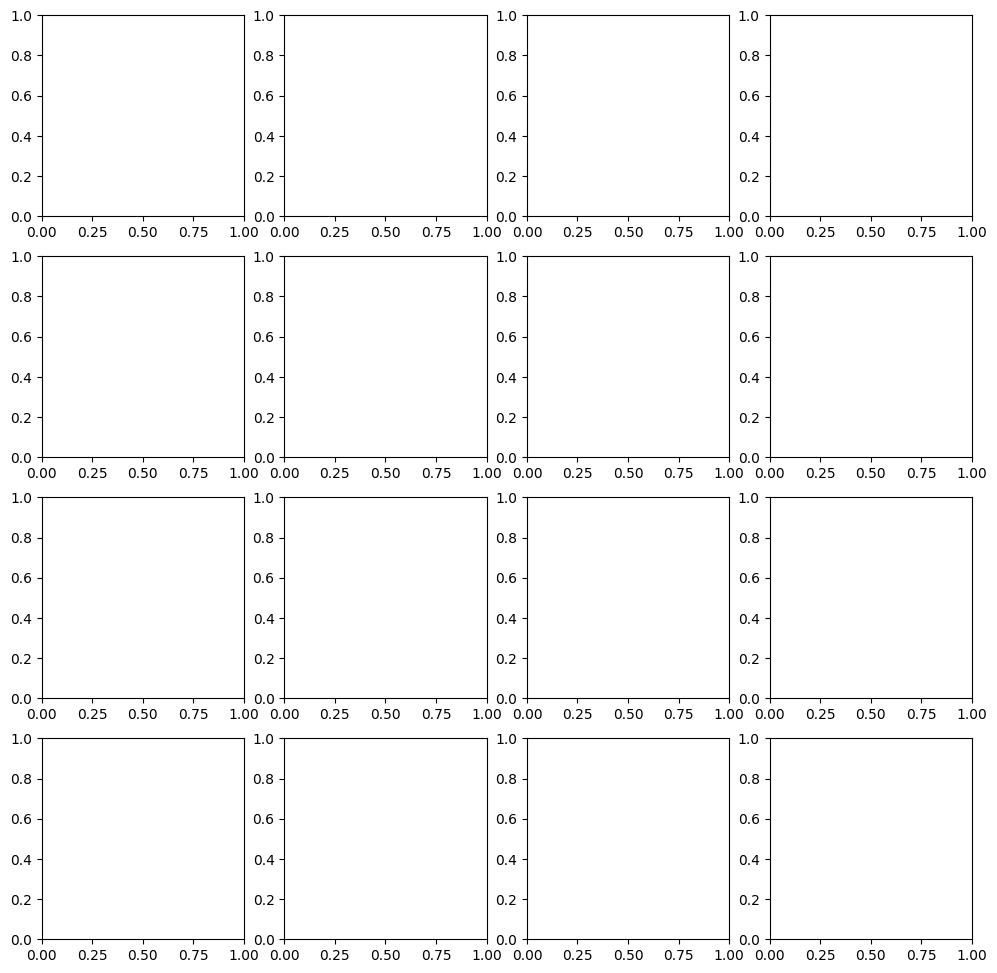

In [16]:
# Load the saved model
model_path = './Model/RF.pkl'
saved_model = joblib.load(model_path)

# Use the saved model for predictions and subplot visualization
new_images_path = './dataset/test/*.jpg'
new_images = glob(new_images_path)

num_images = len(new_images)
num_rows = (num_images + 3) // 4  # Calculate the number of rows needed for the grid

fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(12, 3*num_rows))

for i, image_path in enumerate(new_images):
    image = Image.open(image_path)
    feature_vector = extract_features(image)
    
    # Make prediction using the loaded model
    prediction = saved_model.predict([feature_vector])
    
    # Calculate the subplot index
    row_idx = i // 4
    col_idx = i % 4
    
    # Display the image and prediction
    axes[row_idx, col_idx].imshow(image)
    axes[row_idx, col_idx].set_title(f'Prediction: {prediction}')
    axes[row_idx, col_idx].axis('off')

# Remove any empty subplots if the number of images is not a multiple of 4
if num_images % 4 != 0:
    for i in range(num_images, num_rows * 4):
        axes[num_rows-1, i % 4].axis('off')

plt.tight_layout()
plt.show()